In [309]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn import datasets
from typing import Tuple, Dict, List, Union
%matplotlib inline

#### 3) Implemente o método da Silhueta para definir o número de clusters de uma dada amostra.

##### Vou me basear no exercício 8.8 e montar clusters com 5 iterações para K entre 2 até 8.

In [310]:
def inicialize_centroids(K):
    random_centroids = []
    for _ in range(K):
        random_centroids.append([4 * np.random.random_sample(size=None) - 2, 5 * np.random.sample(size=None) - 5])
    return np.array(random_centroids)

In [311]:
def adjust_data(data, P):
    new_data = []
    for p in range(P):
        new_data.append(data[:, p])
    return np.array(new_data)

In [312]:
def assign_points(centroids: np.ndarray, X: np.ndarray) -> List[Union[np.ndarray, List[np.ndarray]]]:    
    
    assignments = [[c, []] for c in centroids]

    for x_p in X:
        smallest_distance = np.linalg.norm(x_p - centroids[0])
        centroid_assignment = centroids[0]

        for c in centroids:
            distance = np.linalg.norm(x_p - c)
            # print("Distância calculada:", distance)
            if distance < smallest_distance:
                smallest_distance = distance
                centroid_assignment = c
        
        # print("Ponto: {}\nCentróide designado: {}\nDistância: {}\n".format(x_p, centroid_assignment, smallest_distance))
        
        for a in assignments:
            if np.array_equal(a[0], centroid_assignment):
                a[1].append(x_p)
                break

    return assignments

In [313]:
def recalculate_clusters_centroids(clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> np.ndarray: 

    def get_mean(points: List[np.ndarray]) -> np.ndarray:
        qnt = len(points)
        ss = np.zeros(points[0].shape[0])
        for x_p in points:
            ss += x_p
        return ss / qnt

    new_centroids = []

    for i, c in enumerate(clusters):
        centroid, cluster_points = c
        if len(cluster_points) == 0:
            new_centroids.append(centroid)
            continue
        new_c = get_mean(cluster_points)
        new_centroids.append(new_c)

    return new_centroids

In [314]:
def calculate_silhouette_score(clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> float:

    def calculate_mean_distance_between_point_cluster(point: np.ndarray, cluster: Union[np.ndarray, List[np.ndarray]]) -> float:
        mean_distance = 0
        cluster_points = cluster[1]
        for x_p_c in cluster_points:
            if np.array_equal(point, x_p_c):
                continue
            mean_distance += calculate_distenca_between_vectors(point, x_p_c) # always positive
        return mean_distance / len(cluster_points)
    
    def calculate_s_coef(a: float, b: float) -> float:
        s = (b - a) / max(a, b)
        assert s >= -1 and s <= 1, "Something went wrong while calculating S coeficient."
        return s

    def calculate_distenca_between_vectors(v1: np.ndarray, v2: np.ndarray) -> float:
        assert np.size(v1) == np.size(v2), "Vectors should have same length."
        return np.linalg.norm(v1 - v2)
    
    def calculate_cluster_distance(c1: Union[np.ndarray, List[np.ndarray]], c2: Union[np.ndarray, List[np.ndarray]]) -> float:
        return np.linalg.norm(c1[0] - c2[0])
    
    def find_nearest_cluster(main_cluster: Union[np.ndarray, List[np.ndarray]], clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> List[Union[np.ndarray, List[np.ndarray]]]:
        nearest_cluster, nearest_distance = None, None
        for c in clusters:
            centroid, points = c
            # If centroids are equal, they are the same cluster
            if np.array_equal(main_cluster[0], centroid): 
                continue
            distance = calculate_cluster_distance(main_cluster, c)
            if not nearest_cluster or distance < nearest_distance:
                nearest_cluster = c
                nearest_distance = distance
        return nearest_cluster
            
    silhouette_score = 0
    total_points = 0
    score_distribution = {}

    for index, cluster in enumerate(clusters):
        # print("-- Calculando coeficiente S do Cluster {}".format(index + 1))
        centroid, points = cluster
        nearest_cluster = find_nearest_cluster(main_cluster=cluster, clusters=clusters)
        s_coefs = []

        for x_p in points:
            b_coef = calculate_mean_distance_between_point_cluster(x_p, nearest_cluster)
            a_coef = calculate_mean_distance_between_point_cluster(x_p, cluster)
            s_coef = calculate_s_coef(a_coef, b_coef)
            s_coefs.append(s_coef)
            silhouette_score += s_coef
            total_points += 1

        score_distribution["C{}".format(index + 1)] = s_coefs

    # Bar graph
    colors = ['red', 'blue', 'green', 'orange', 'black', 'grey', 'yellow', 'pink', 'brown']
    fig, ax = plt.subplots(figsize=(6, 4))
    cont = 0
    y_axis = 0

    for cluster_index, scores in score_distribution.items():
        color = colors[cont]
        for score in scores:
            ax.barh(y_axis, score, color=color, height=0.5)
            y_axis += 1
        cont += 1
        

    # Ajustando o espaçamento entre as barras
    plt.subplots_adjust(left=0.2)  # Ajuste o valor de left conforme necessário para diminuir o espaçamento
    
    # Configurações do gráfico
    plt.xlabel('S Score')
    plt.ylabel('Indíce dos pontos')
    plt.title('Score por ponto separado em cores por cluster')

    legend_elements = [Patch(facecolor=cor, edgecolor='black', label=label) for cor, label in zip(colors, score_distribution.keys())]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.show()

    return silhouette_score / total_points





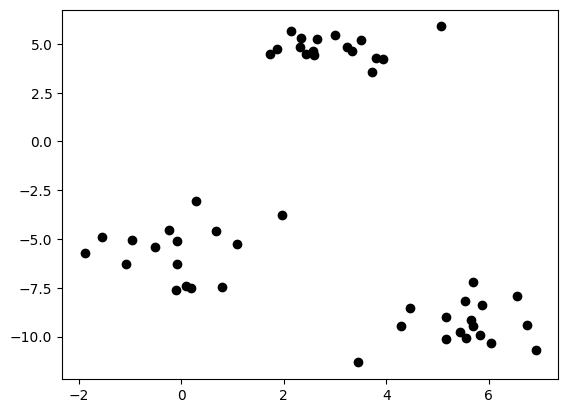

In [315]:
# Loading the data
P = 50 # Number of data points
blobs = datasets.make_blobs(n_samples=P, centers=3, random_state=10)
data = np.transpose(blobs[0])

# scatter plot the dataset 
plt.scatter(data[0,:],data[1,:],c = 'k')
plt.show();


--------
Gerando para 3 clusters.


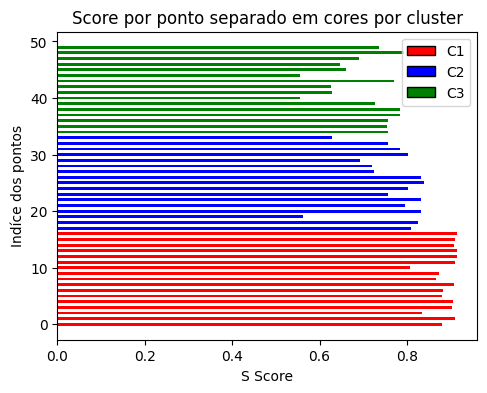

S Score para 3 clusters: 0.7867682207672739

--------
Gerando para 4 clusters.


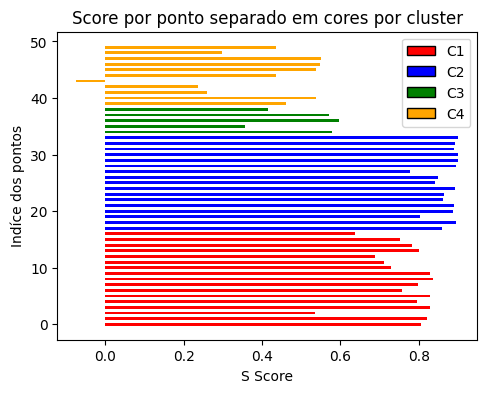

S Score para 4 clusters: 0.6899168010547158

--------
Gerando para 5 clusters.


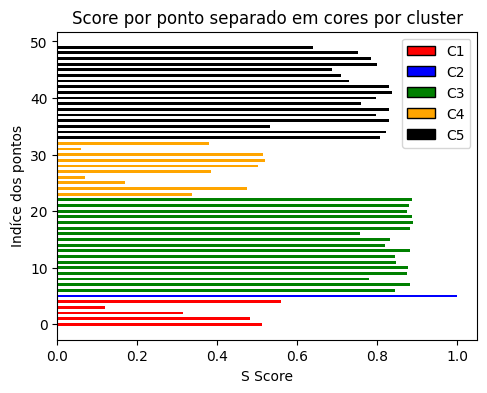

S Score para 5 clusters: 0.6769269684910628
--------
Resultados finais:
 {3: 0.7867682207672739, 4: 0.6899168010547158, 5: 0.6769269684910628}
--------
Número ideal de clusters (maior score): 3


In [316]:
K = 3
N = 2
I = 7

silhouette_result = {}

for k_s in range(3, 6):

    print("\n--------\nGerando para {} clusters.".format(k_s))

    adjusted_data = adjust_data(data, P)
    initial_centroids_guess = inicialize_centroids(k_s)
    centroids = initial_centroids_guess

    for i in range(I):
        centroids = initial_centroids_guess if i == 0 else recalculate_clusters_centroids(clusters=clusters);
        clusters = assign_points(centroids=centroids, X=adjusted_data);

    s_coef = calculate_silhouette_score(clusters)
    silhouette_result[k_s] = s_coef
    
    print("S Score para {} clusters: {}".format(k_s, s_coef))

print("--------\nResultados finais:\n", silhouette_result)

maior = 0
m_cluster = None

for n_clusters, score in silhouette_result.items():
    if score > maior:
        maior = score
        m_cluster = n_clusters

print("--------\nNúmero ideal de clusters (maior score): {}".format(m_cluster))
        

